In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import harmonypy as hm
import anndata
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import io

sc.settings.set_figure_params(dpi=500, dpi_save=1000, figsize=(5,5), facecolor='white')

# set random seed for reproducibility:
np.random.seed(42)


In [2]:
# set working dir 
os.chdir('/dfs3b/swaruplab/shared_lab/cross-disorder/analysis/individual/Morabito_2020/')

fig_dir = 'figures/'
data_dir = 'data/'


## Load Morabito 2020 dataset

In [4]:
count_data_dir = '/dfs3b/swaruplab/shared_lab/cross-disorder/count_matrices/Morabito_2020/'
samples = [s for s in os.listdir(count_data_dir)]
adata_list = []
for sample in samples:
    try:
        adata = sc.read_h5ad('{}{}/scanpy_preprocessing_cellbender/data/adata_unfiltered.h5ad'.format(count_data_dir, sample))
    except:
        print('sample', sample, ' error')
        continue
    adata.obs['Sample'] = sample
    adata.obs['Study'] = 'Morabito_2020'
    adata.obs['orig_barcode'] = adata.obs.index

    adata_list.append(adata)

    print(sample, adata.layers['spliced'].shape)


121 (6684, 36601)
165 (5632, 36601)
23 (10623, 36601)
187 (8961, 36601)
280 (9937, 36601)


In [5]:
# concatenate
adata = adata_list[0].concatenate(adata_list[1:])
adata.obs['barcode'] = adata.obs.index

# filter small cells
sc.pp.filter_cells(adata, min_counts = 250)

# add counts layer
adata.layers["counts"] = adata.X.copy()

# print shape of dataset
adata.shape


(41792, 36601)

In [8]:
# load sample meta:
sample_meta = pd.read_csv(
    '/dfs3b/swaruplab/shared_lab/cross-disorder/meta_data/Morabito_2020/Morabito_2020_meta.csv',
    sep=','
)
sample_meta['Sample.ID'] = sample_meta['Sample.ID'].astype(str)

temp = adata.obs.merge(
    sample_meta,
    how = 'left',
    left_on = 'Sample',
    right_on = 'Sample.ID'
)
temp.index = temp.barcode
adata.obs = temp
adata.obs.index.name = None



In [9]:
adata.obs.head()

orig_barcode  n_counts  doublet_scores doublets  \
CACAGTAAGCTAGCCC-0  CACAGTAAGCTAGCCC  212921.0        0.289474  Singlet   
GACACGCGTCATCGGC-0  GACACGCGTCATCGGC  106982.0        0.095794  Singlet   
CCGGGATGTCAGATAA-0  CCGGGATGTCAGATAA   95453.0        0.483607  Doublet   
GTTCATTGTTCGCGAC-0  GTTCATTGTTCGCGAC   92805.0        0.389831  Singlet   
CCATGTCAGTCATCCA-0  CCATGTCAGTCATCCA   91807.0        0.167808  Singlet   

                   Sample          Study batch             barcode Sample.ID  \
CACAGTAAGCTAGCCC-0    121  Morabito_2020     0  CACAGTAAGCTAGCCC-0       121   
GACACGCGTCATCGGC-0    121  Morabito_2020     0  GACACGCGTCATCGGC-0       121   
CCGGGATGTCAGATAA-0    121  Morabito_2020     0  CCGGGATGTCAGATAA-0       121   
GTTCATTGTTCGCGAC-0    121  Morabito_2020     0  GTTCATTGTTCGCGAC-0       121   
CCATGTCAGTCATCCA-0    121  Morabito_2020     0  CCATGTCAGTCATCCA-0       121   

                    Case.Year Region                  Neuropath.Dx.1  Age Sex  \
CACAGTAAGCTAGCCC-0       1997     FC  Normal - No Pathology Detected   67   M   
GACACGCGTCATCGGC-0       1997     FC  Normal - No Pathology Detected   67   M   
CCGGGATGTCAGATAA-0       1997     FC  Normal - No Pathology Detected   67   M   
GTTCATTGTTCGCGAC-0       1997     FC  Normal - No Pathology Detected   67   M   
CCATGTCAGTCATCCA-0       1997     FC  Normal - No Pathology Detected   67   M   

                     PMI Clinical.Syndrome Diagnosis  \
CACAGTAAGCTAGCCC-0  2.72               NaN   Control   
GACACGCGTCATCGGC-0  2.72               NaN   Control   
CCGGGATGTCAGATAA-0  2.72               NaN   Control   
GTTCATTGTTCGCGAC-0  2.72               NaN   Control   
CCATGTCAGTCATCCA-0  2.72               NaN   Control   

                             Plaques.Tangles  RIN  
CACAGTAAGCTAGCCC-0  No plaques/tangles found  7.5  
GACACGCGTCATCGGC-0  No plaques/tangles found  7.5  
CCGGGATGTCAGATAA-0  No plaques/tangles found  7.5  
GTTCATTGTTCGCGAC-0  No plaques/tangles found  7.5  
CCATGTCAGTCATCCA-0  No plaques/tangles found  7.5

In [10]:
# save unfiltered dataset:
adata.write_h5ad('{}Morabito_2020_unfiltered.h5ad'.format(data_dir))


/dfs3b/swaruplab/smorabit/bin/software/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig_barcode' as categorical
/dfs3b/swaruplab/smorabit/bin/software/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample' as categorical
/dfs3b/swaruplab/smorabit/bin/software/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `i

## Quality Control Filtering

In [11]:
# load unfiltered data 
adata = sc.read_h5ad('{}Morabito_2020_unfiltered.h5ad'.format(data_dir))

In [12]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)

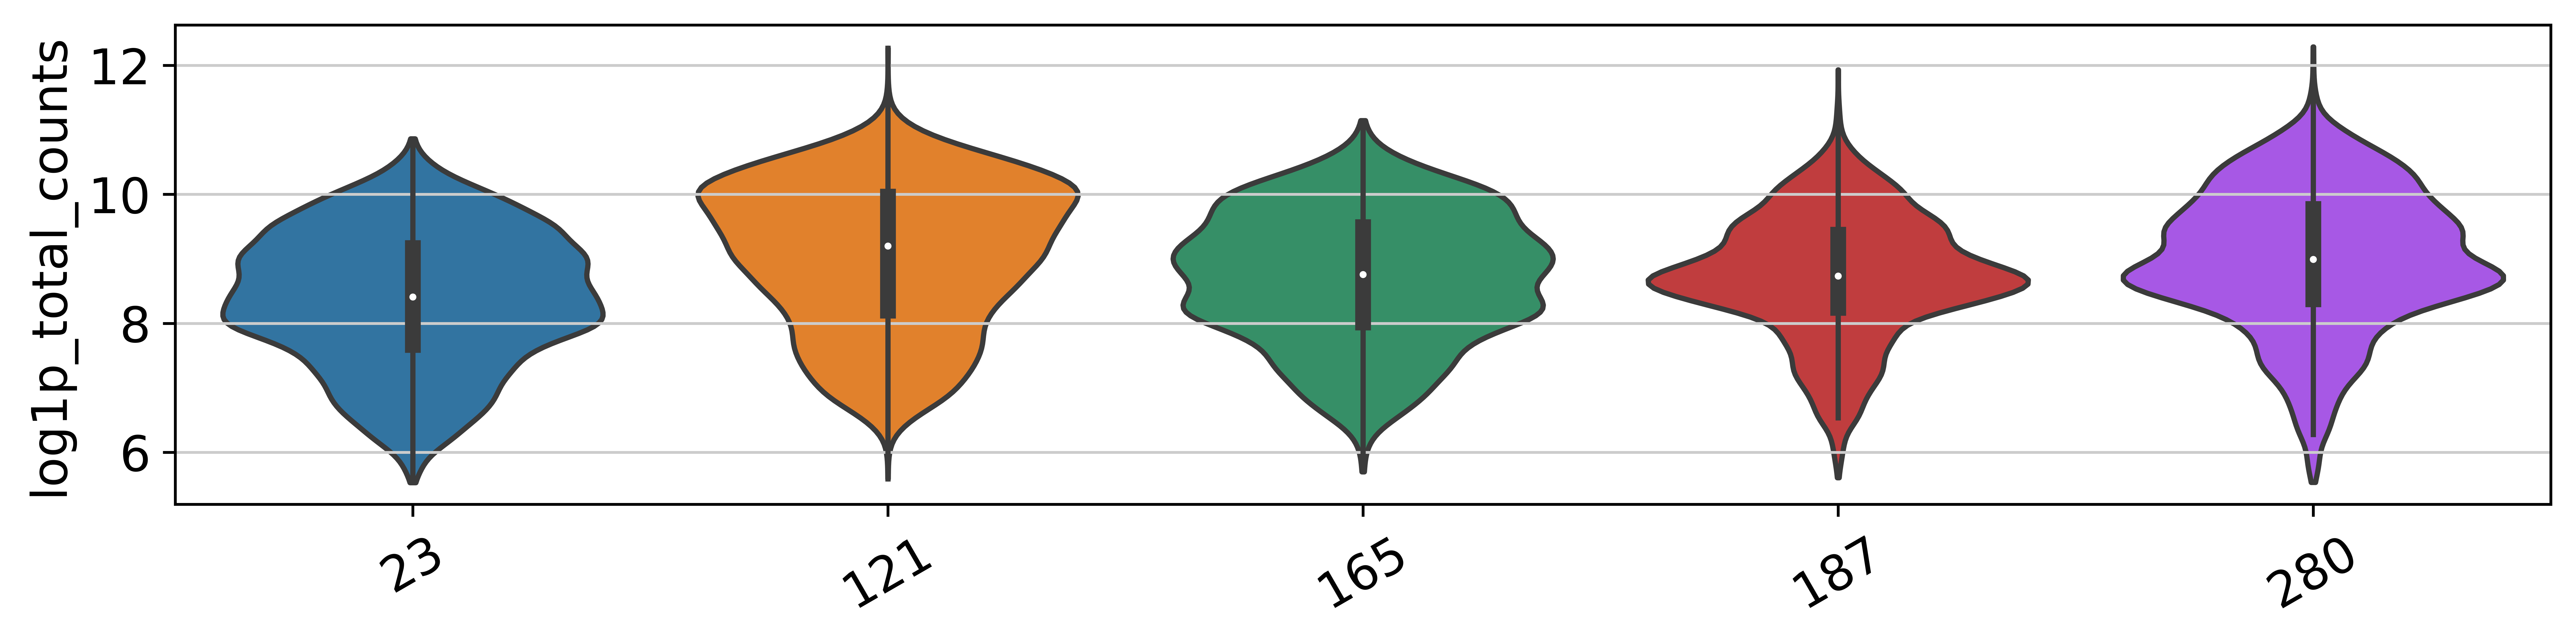

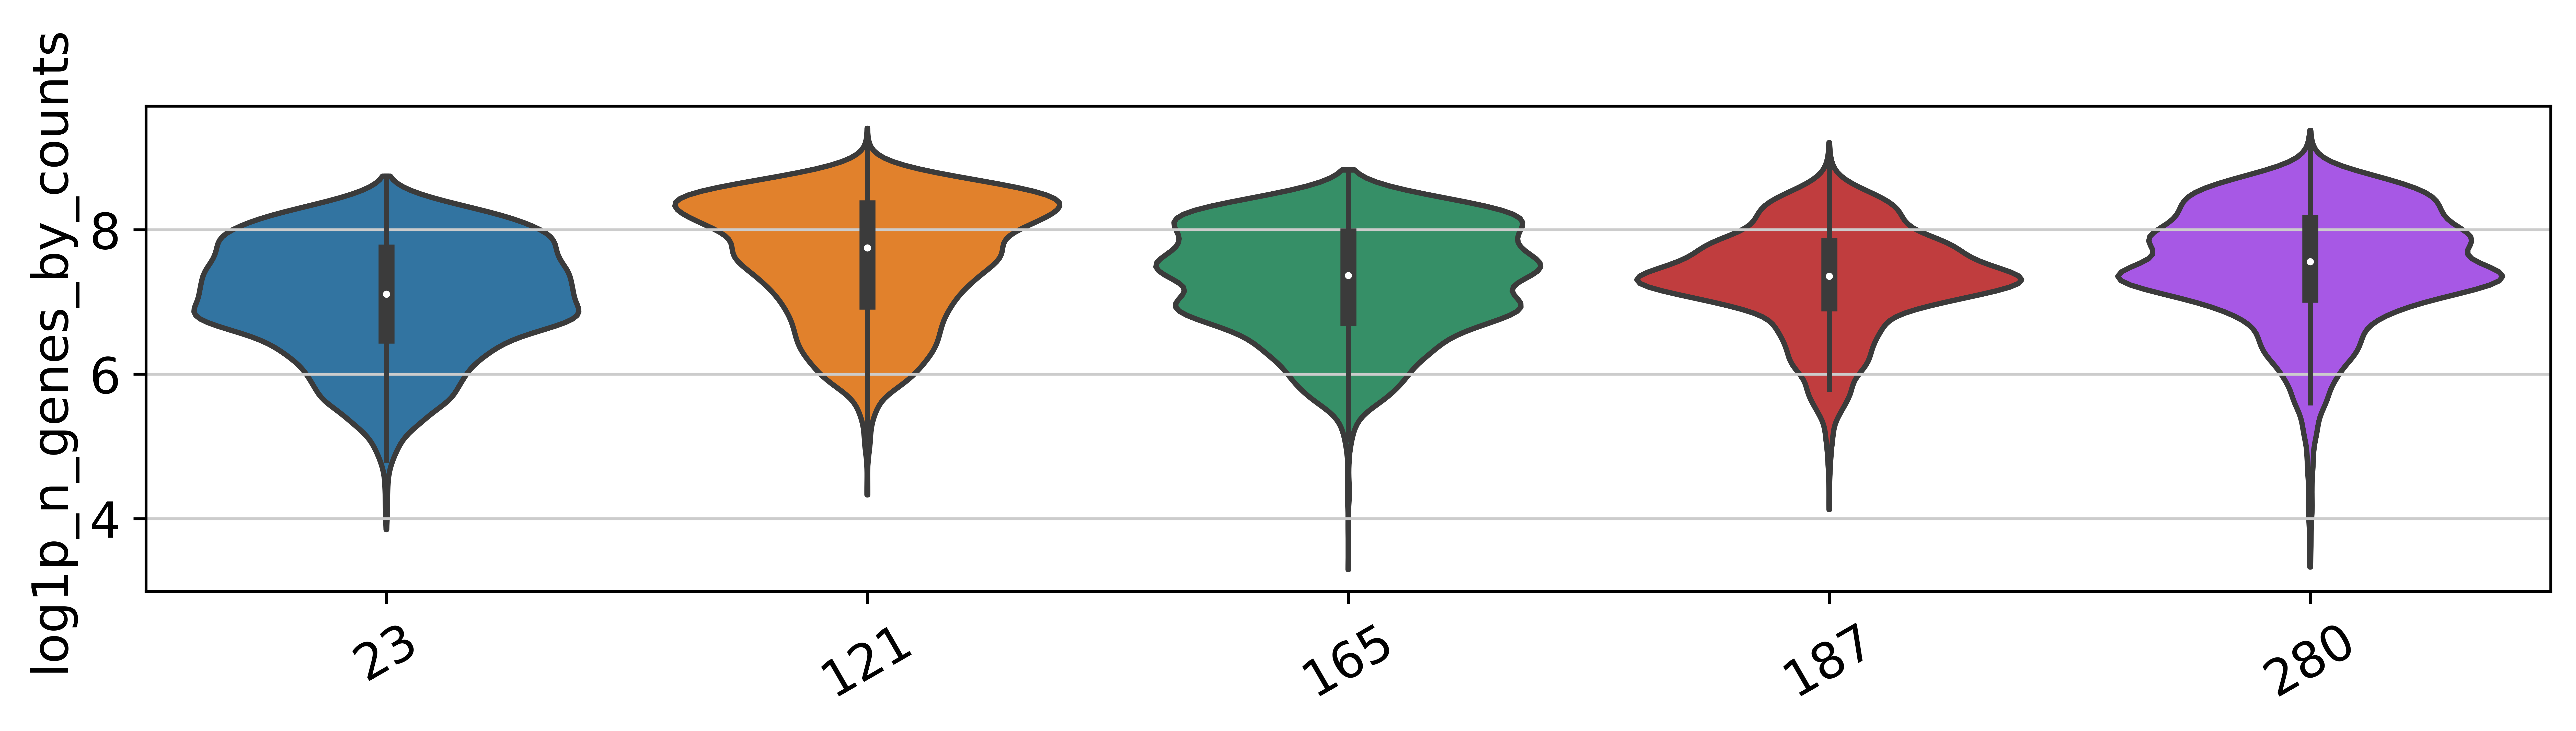

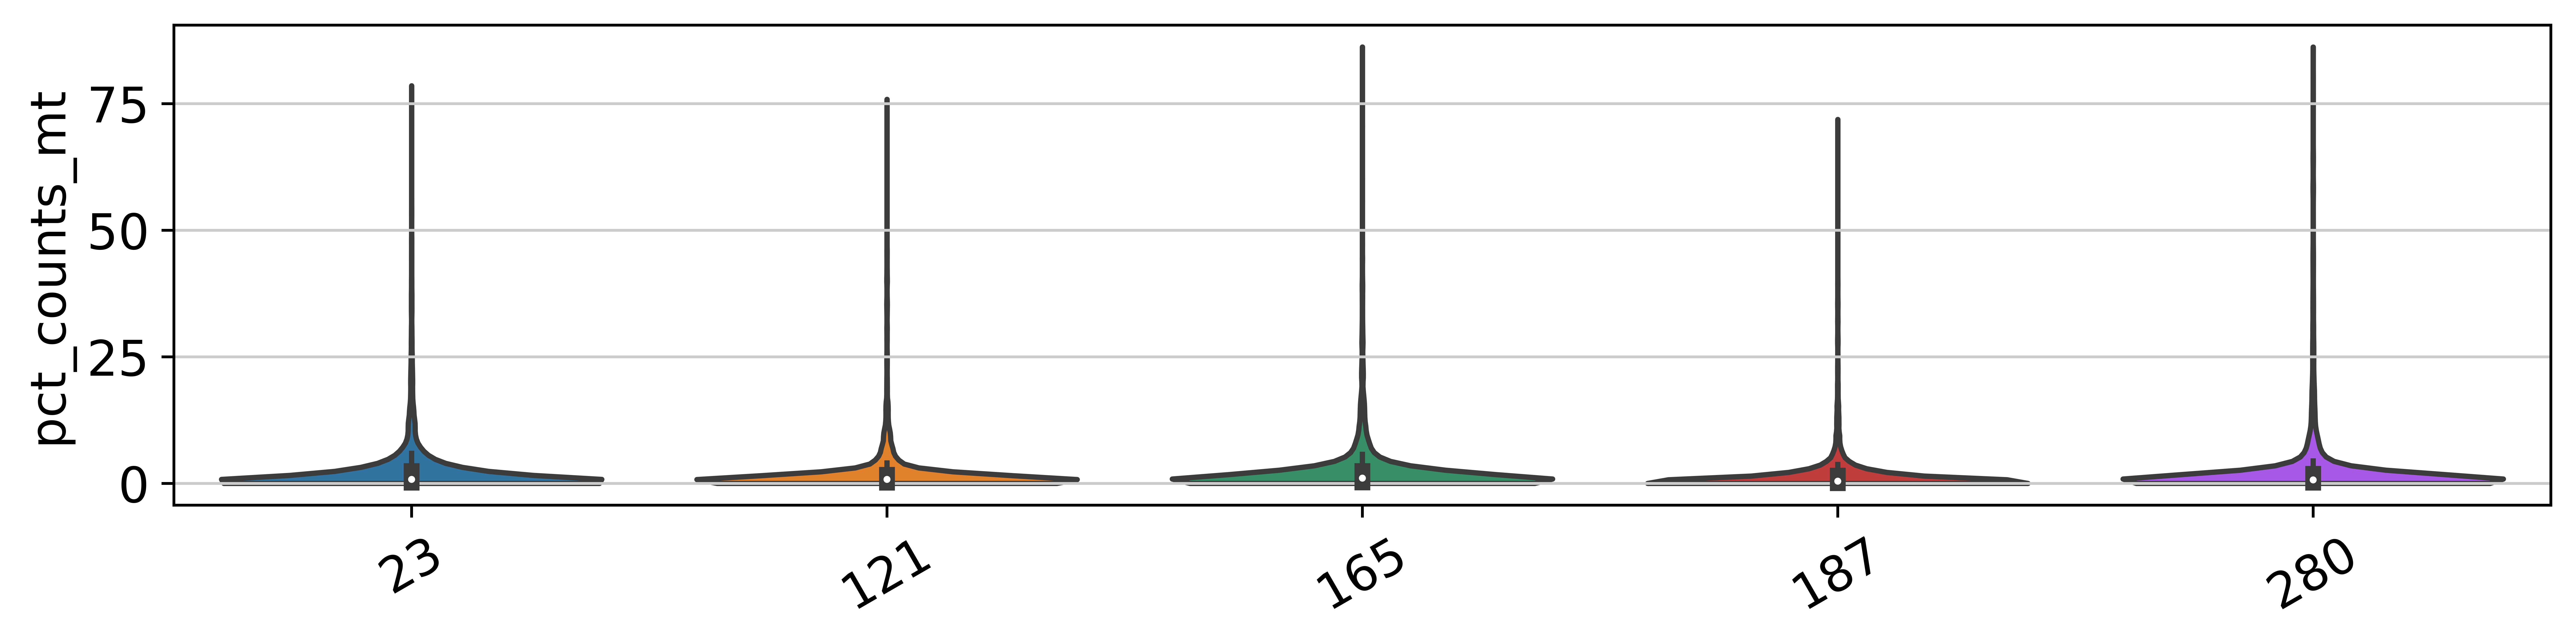

In [13]:
sc.settings.set_figure_params(dpi=500, dpi_save=1000, figsize=(10,2.5), facecolor='white')
sc.pl.violin(adata,[ 'log1p_total_counts'], inner='box', size=0,  groupby='Sample', multi_panel=False, rotation=30)
sc.pl.violin(adata,[ 'log1p_n_genes_by_counts'], inner='box', size=0,  groupby='Sample', multi_panel=False, rotation=30)
sc.pl.violin(adata,[ 'pct_counts_mt'], inner='box', size=0,  groupby='Sample', multi_panel=False, rotation=30)

In [14]:

mt_quantile = 0.975 
umi_quantile = 0.975
doublet_quantile = 0.95

samples = adata.obs.Sample.value_counts().index.to_list()
good_barcodes = []
for cur_sample in samples:
    
    # get just this sample
    cur_adata = adata[adata.obs.Sample == cur_sample]
    orig_cells = cur_adata.shape[0]
    
    # compute cutoffs for each sample
    mt_cutoff = cur_adata.obs.pct_counts_mt.quantile(mt_quantile)
    umi_cutoff = cur_adata.obs.total_counts.quantile(umi_quantile)
    doublet_cutoff = cur_adata.obs.doublet_scores.quantile(doublet_quantile)
    
    # subset the data based on thresholds
    cur_adata = cur_adata[(cur_adata.obs.pct_counts_mt < mt_cutoff) & (cur_adata.obs.total_counts < umi_cutoff) & (cur_adata.obs.doublet_scores < doublet_cutoff)]
    new_cells = cur_adata.shape[0]
    
    keep_cells = cur_adata.obs.barcode.to_list() 
    good_barcodes = good_barcodes + keep_cells
    print(cur_sample, 'removed ', orig_cells-new_cells, ', kept ', new_cells)

    

23 removed  1046 , kept  9557
280 removed  975 , kept  8946
187 removed  897 , kept  8059
121 removed  684 , kept  6000
165 removed  557 , kept  5071


In [15]:
# subset the full data by the good barcodes
adata = adata[adata.obs.index.isin(good_barcodes)]
adata.shape

(37633, 36601)

In [16]:
adata = adata[adata.obs.n_genes_by_counts >= 250]
adata = adata[adata.obs.pct_counts_mt <= 10]

adata.shape

(36785, 36601)

## Process data:

In [17]:
# preserve the counts in its own layer
adata.layers['counts'] = adata.X

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [19]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'], n_jobs=16)
sc.pp.scale(adata, max_value=10)


In [20]:
sc.tl.pca(adata, svd_solver='arpack')

In [21]:
sc.external.pp.harmony_integrate(adata, key = 'Sample')

2022-01-20 12:52:04,986 - harmonypy - INFO - Iteration 1 of 10
2022-01-20 12:52:16,437 - harmonypy - INFO - Iteration 2 of 10
2022-01-20 12:52:27,752 - harmonypy - INFO - Iteration 3 of 10
2022-01-20 12:52:38,986 - harmonypy - INFO - Iteration 4 of 10
2022-01-20 12:52:50,136 - harmonypy - INFO - Iteration 5 of 10
2022-01-20 12:53:01,350 - harmonypy - INFO - Converged after 5 iterations


In [22]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony', n_neighbors=20, n_pcs=30, metric='cosine')

In [23]:
sc.tl.umap(adata, min_dist=0.35, method='umap')

In [24]:
sc.tl.leiden(adata, resolution=1)

#compute dendrogram for the dotplot:
sc.tl.dendrogram(adata, 'leiden')

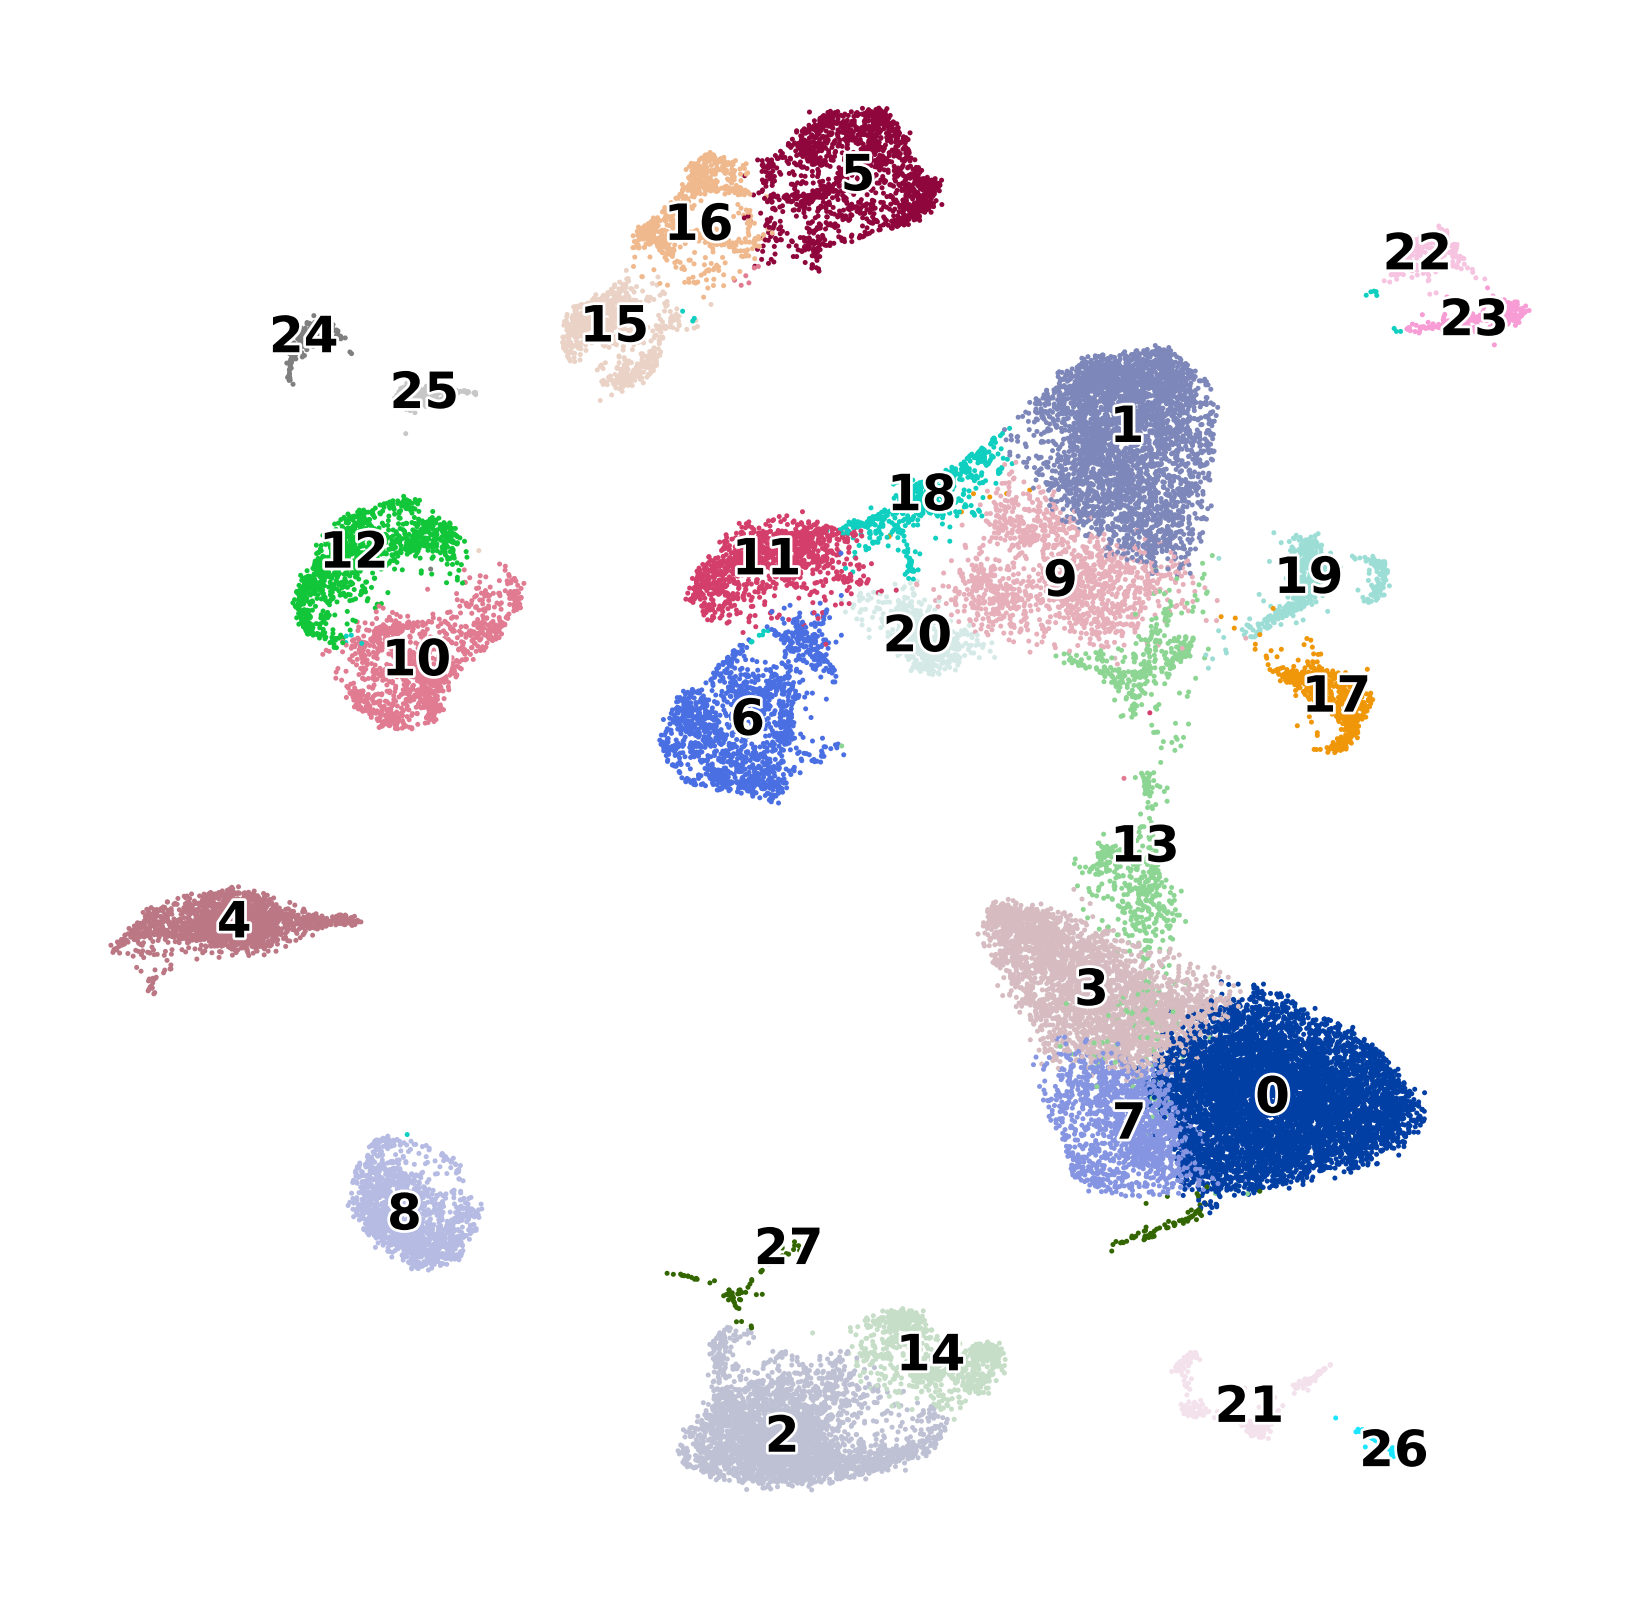

In [25]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000, figsize=(5,5), facecolor='white')
sc.pl.umap(
    adata, 
    color=['leiden'],
    frameon=False, 
    legend_loc='on data', 
    legend_fontoutline=1, 
    legend_fontsize=9, 
    title='',
    save='_leiden.pdf'
)


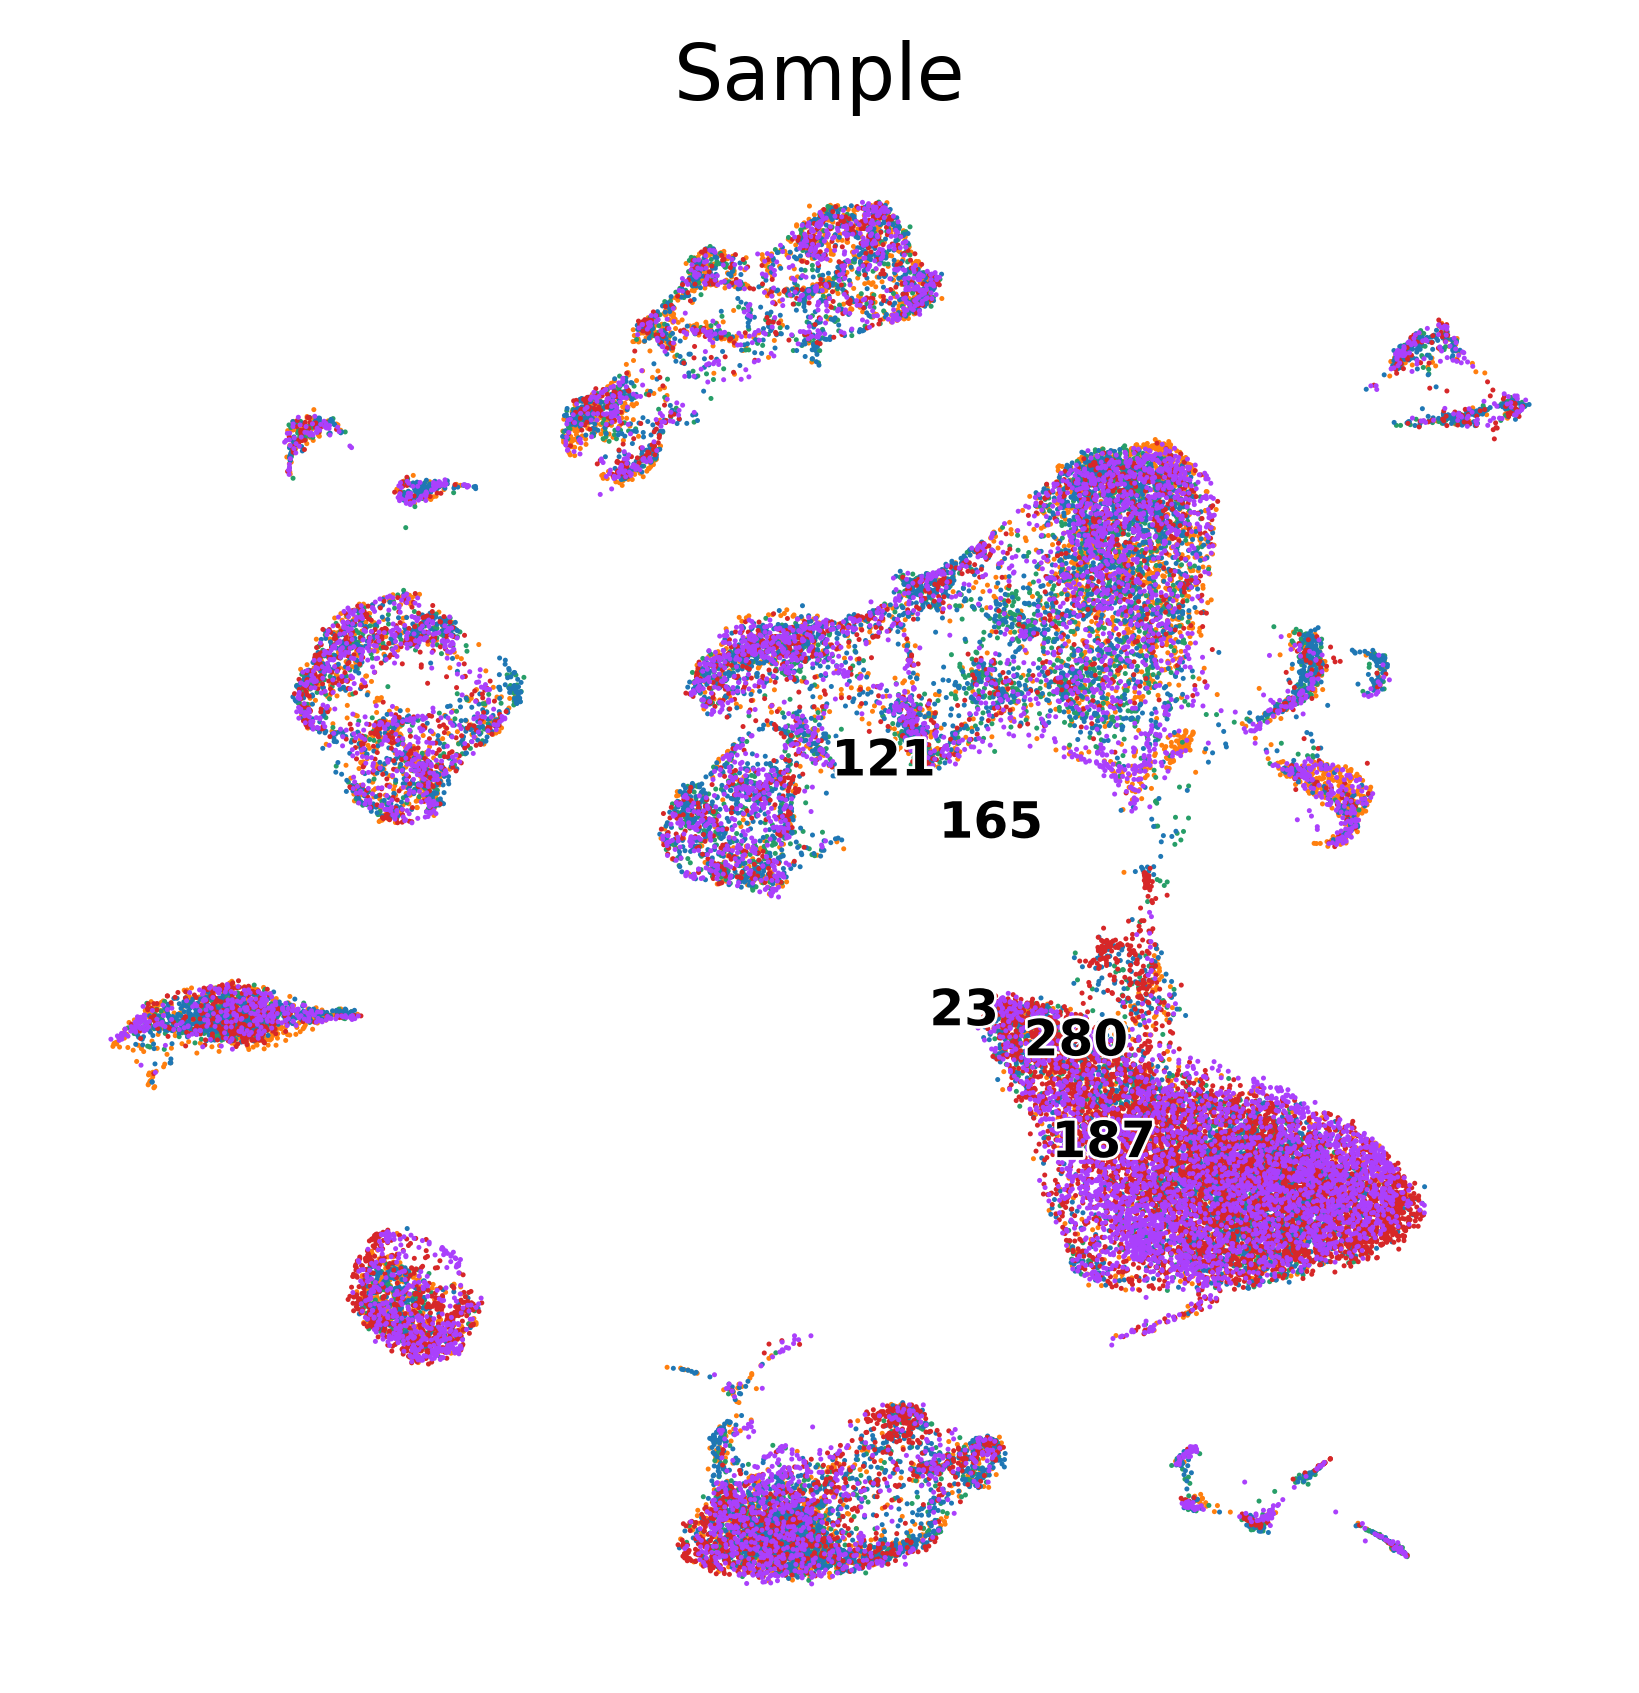

In [27]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000, figsize=(5,5), facecolor='white')
sc.pl.umap(
    adata, 
    color=['Sample'],
    frameon=False, 
    legend_loc='on data', 
    legend_fontoutline=1, 
    legend_fontsize=9, 
    save='_Sample.pdf'
)

categories: 0, 1, 2, etc.
var_group_labels: Oligodendrocyte, Astrocyte, Microglia, etc.


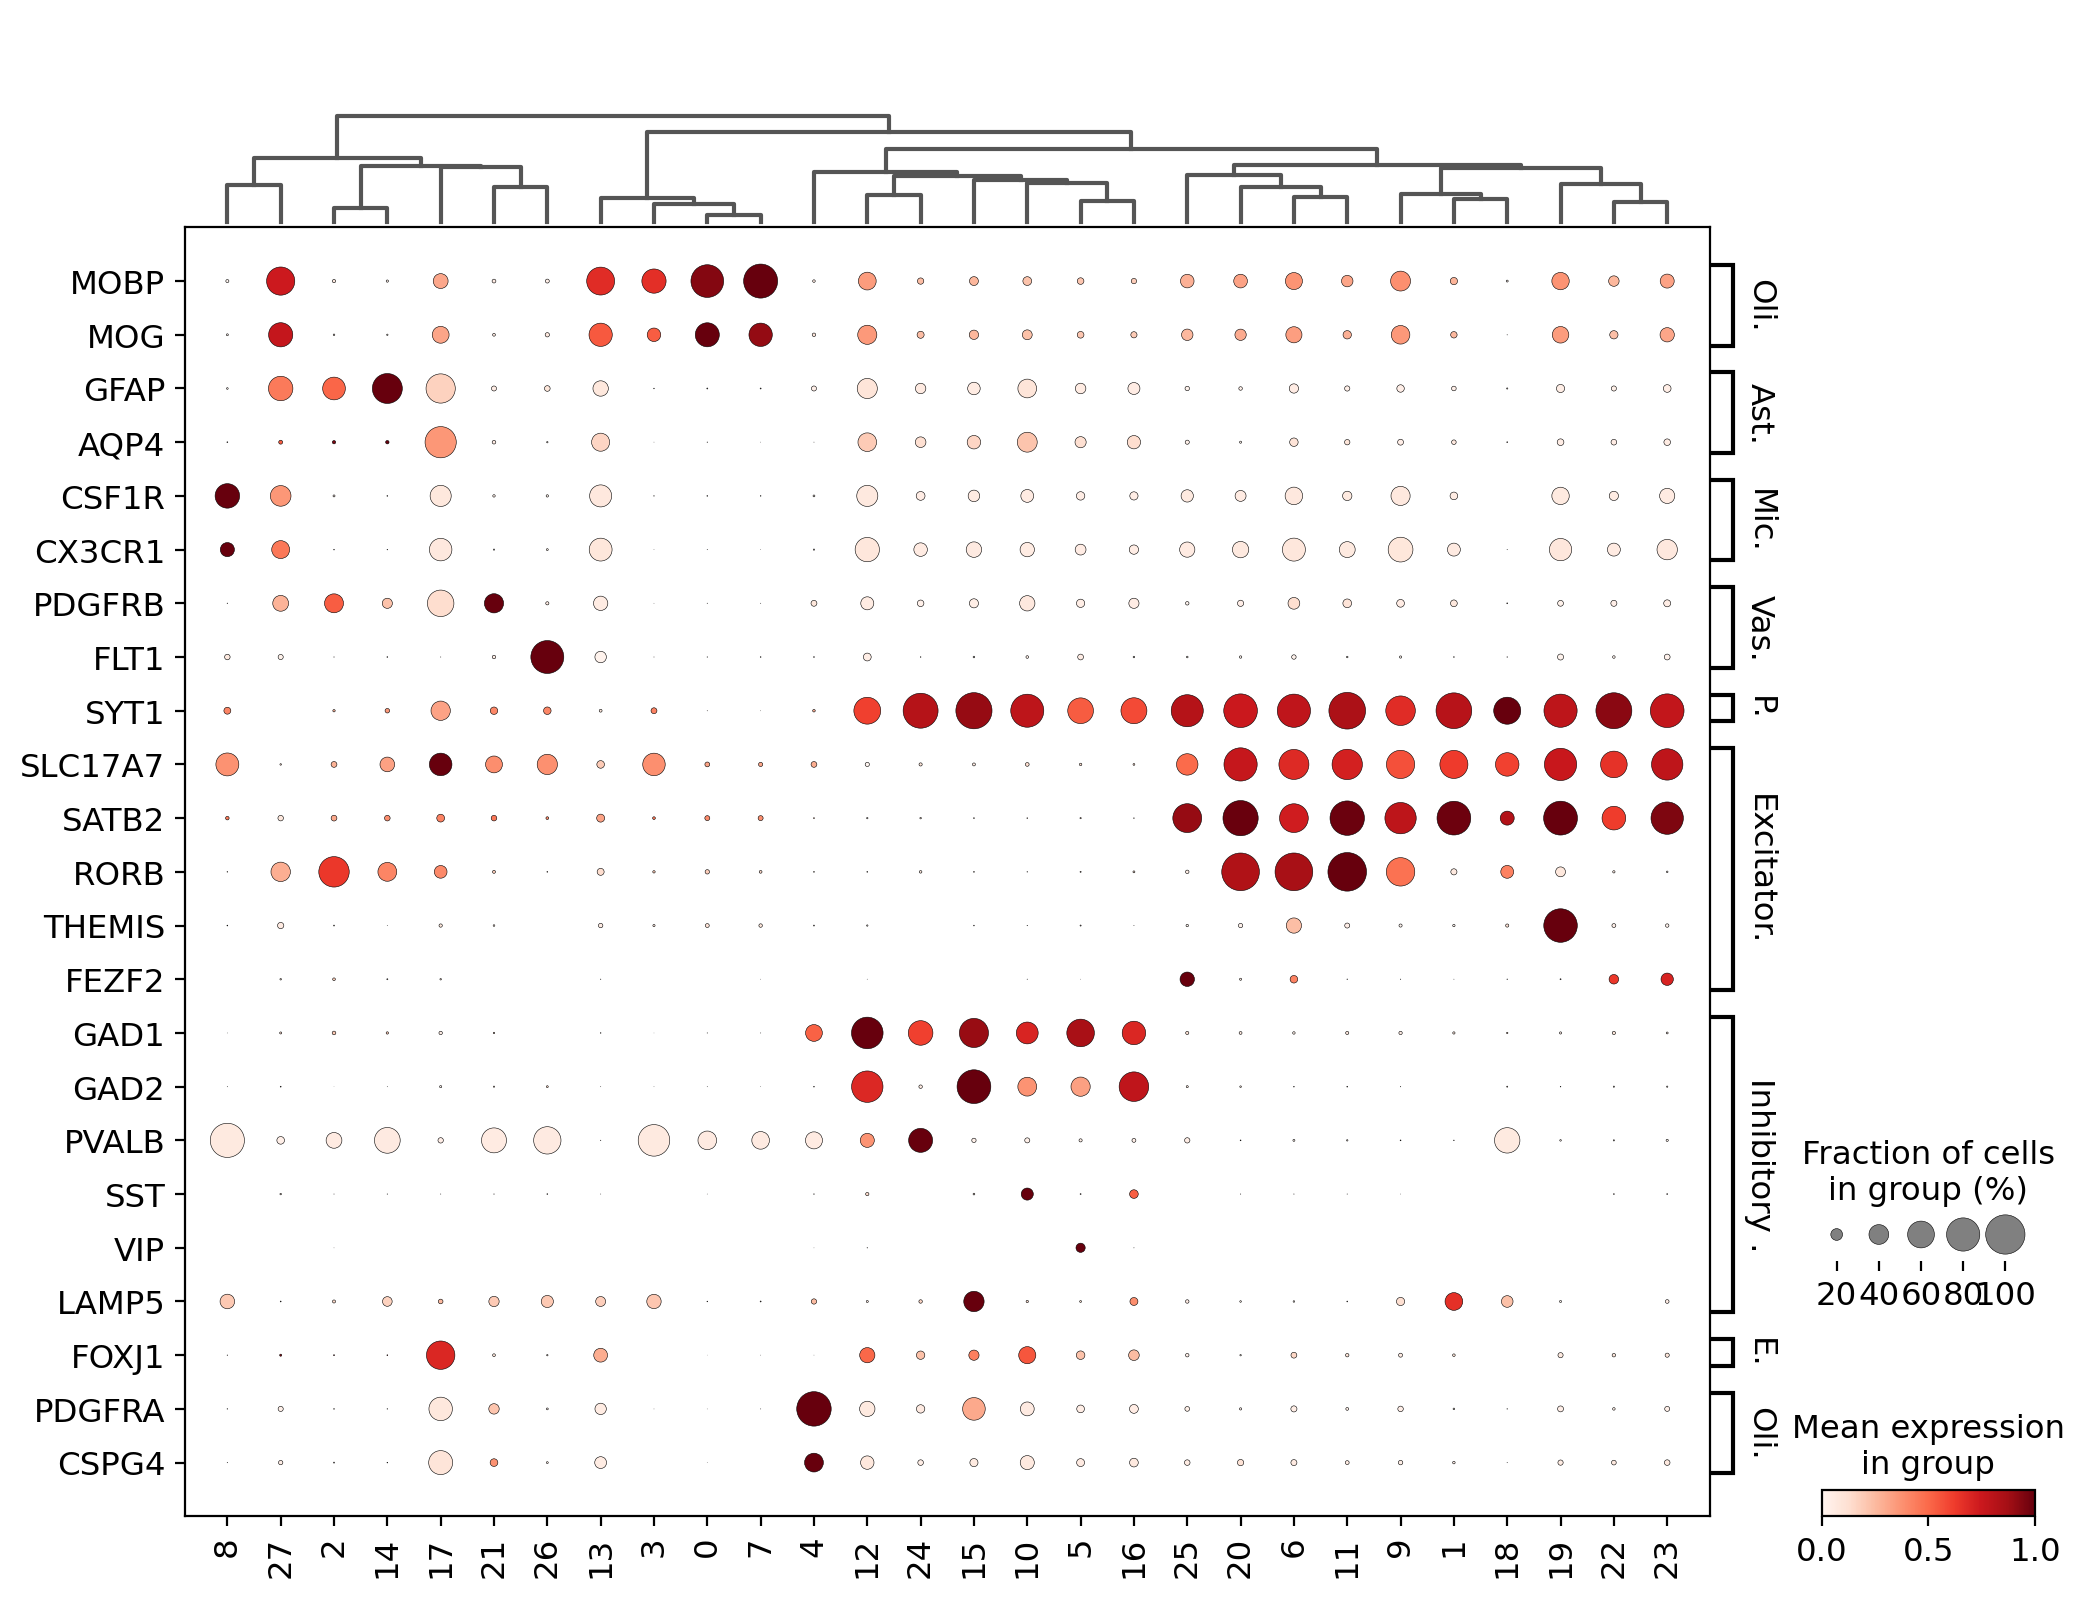

In [26]:
marker_dict = {
    'Oligodendrocyte': ['MOBP', 'MOG'],
    'Astrocyte': ['GFAP', 'AQP4'],
    'Microglia': ['CSF1R', 'CX3CR1',],
    'Vasculature': ['PDGFRB', 'FLT1'],
    'Pan-neuronal': ['SYT1'],
    'Excitatory Neuron': ['SLC17A7', 'SATB2', 'RORB', 'THEMIS', 'FEZF2'],
    'Inhibitory Neuron': ['GAD1', 'GAD2', 'PVALB', 'SST', 'VIP', 'LAMP5'],
    'Ependyma' : ['FOXJ1'], # not expressed
    'Oligodendrocyte Progenitor': ['PDGFRA', 'CSPG4']
}

sc.set_figure_params(dpi=100)
sc.pl.dotplot(
    adata, marker_dict, 'leiden', 
    dendrogram=True, 
    standard_scale='var', swap_axes=True
)


## Annotate clusters

In [28]:

# load cluster anno df 
anno_df = pd.read_csv('{}Morabito_leiden_clusters.csv'.format(data_dir))

anno_df.leiden = anno_df.leiden.astype(str)
temp = adata.obs.merge(
    anno_df, how='left',
    on = 'leiden')

adata.obs['cell_type'] = temp['cell_type'].astype(str).to_list()
adata.obs['annotation'] = temp['annotation'].astype(str).to_list()



In [29]:
# remove unknown & doublet clusters:
clusters_to_remove = ['Unknown', 'Doublet']
adata = adata[~adata.obs.annotation.isin(clusters_to_remove)]


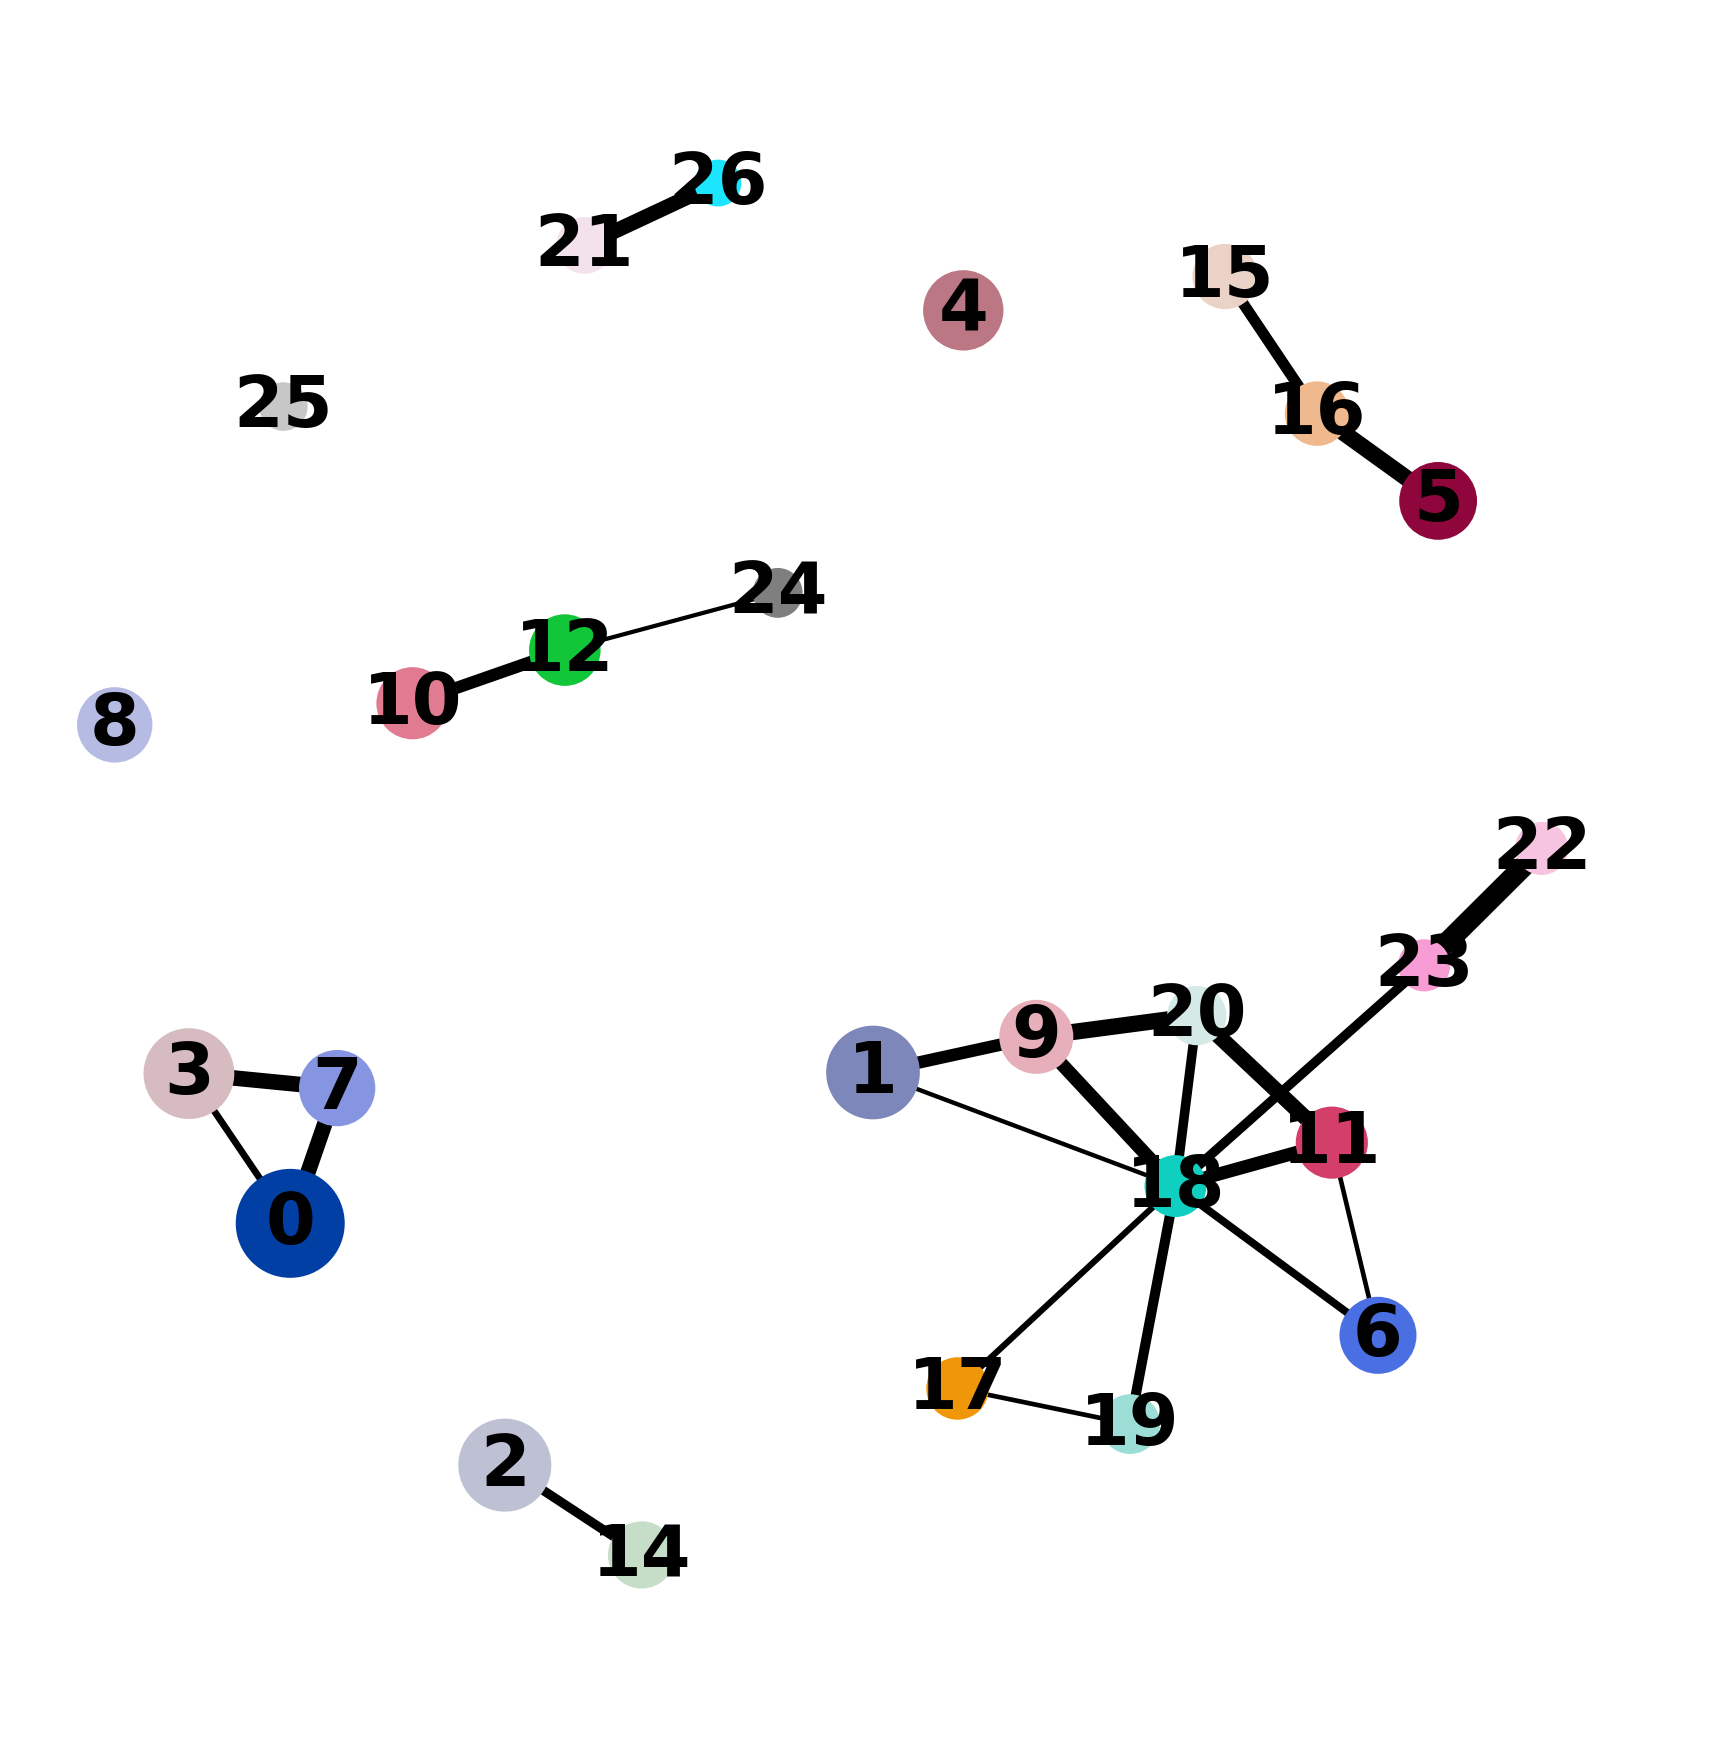

In [33]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000, figsize=(5,5), facecolor='white')
sc.tl.paga(adata)
sc.pl.paga(
    adata, threshold=0.2, title='', edge_width_scale=0.5,
    frameon=False, save=True
)
 

In [34]:
# re-compute UMAP using paga as initial position
sc.tl.umap(adata, min_dist=0.4, init_pos='paga')

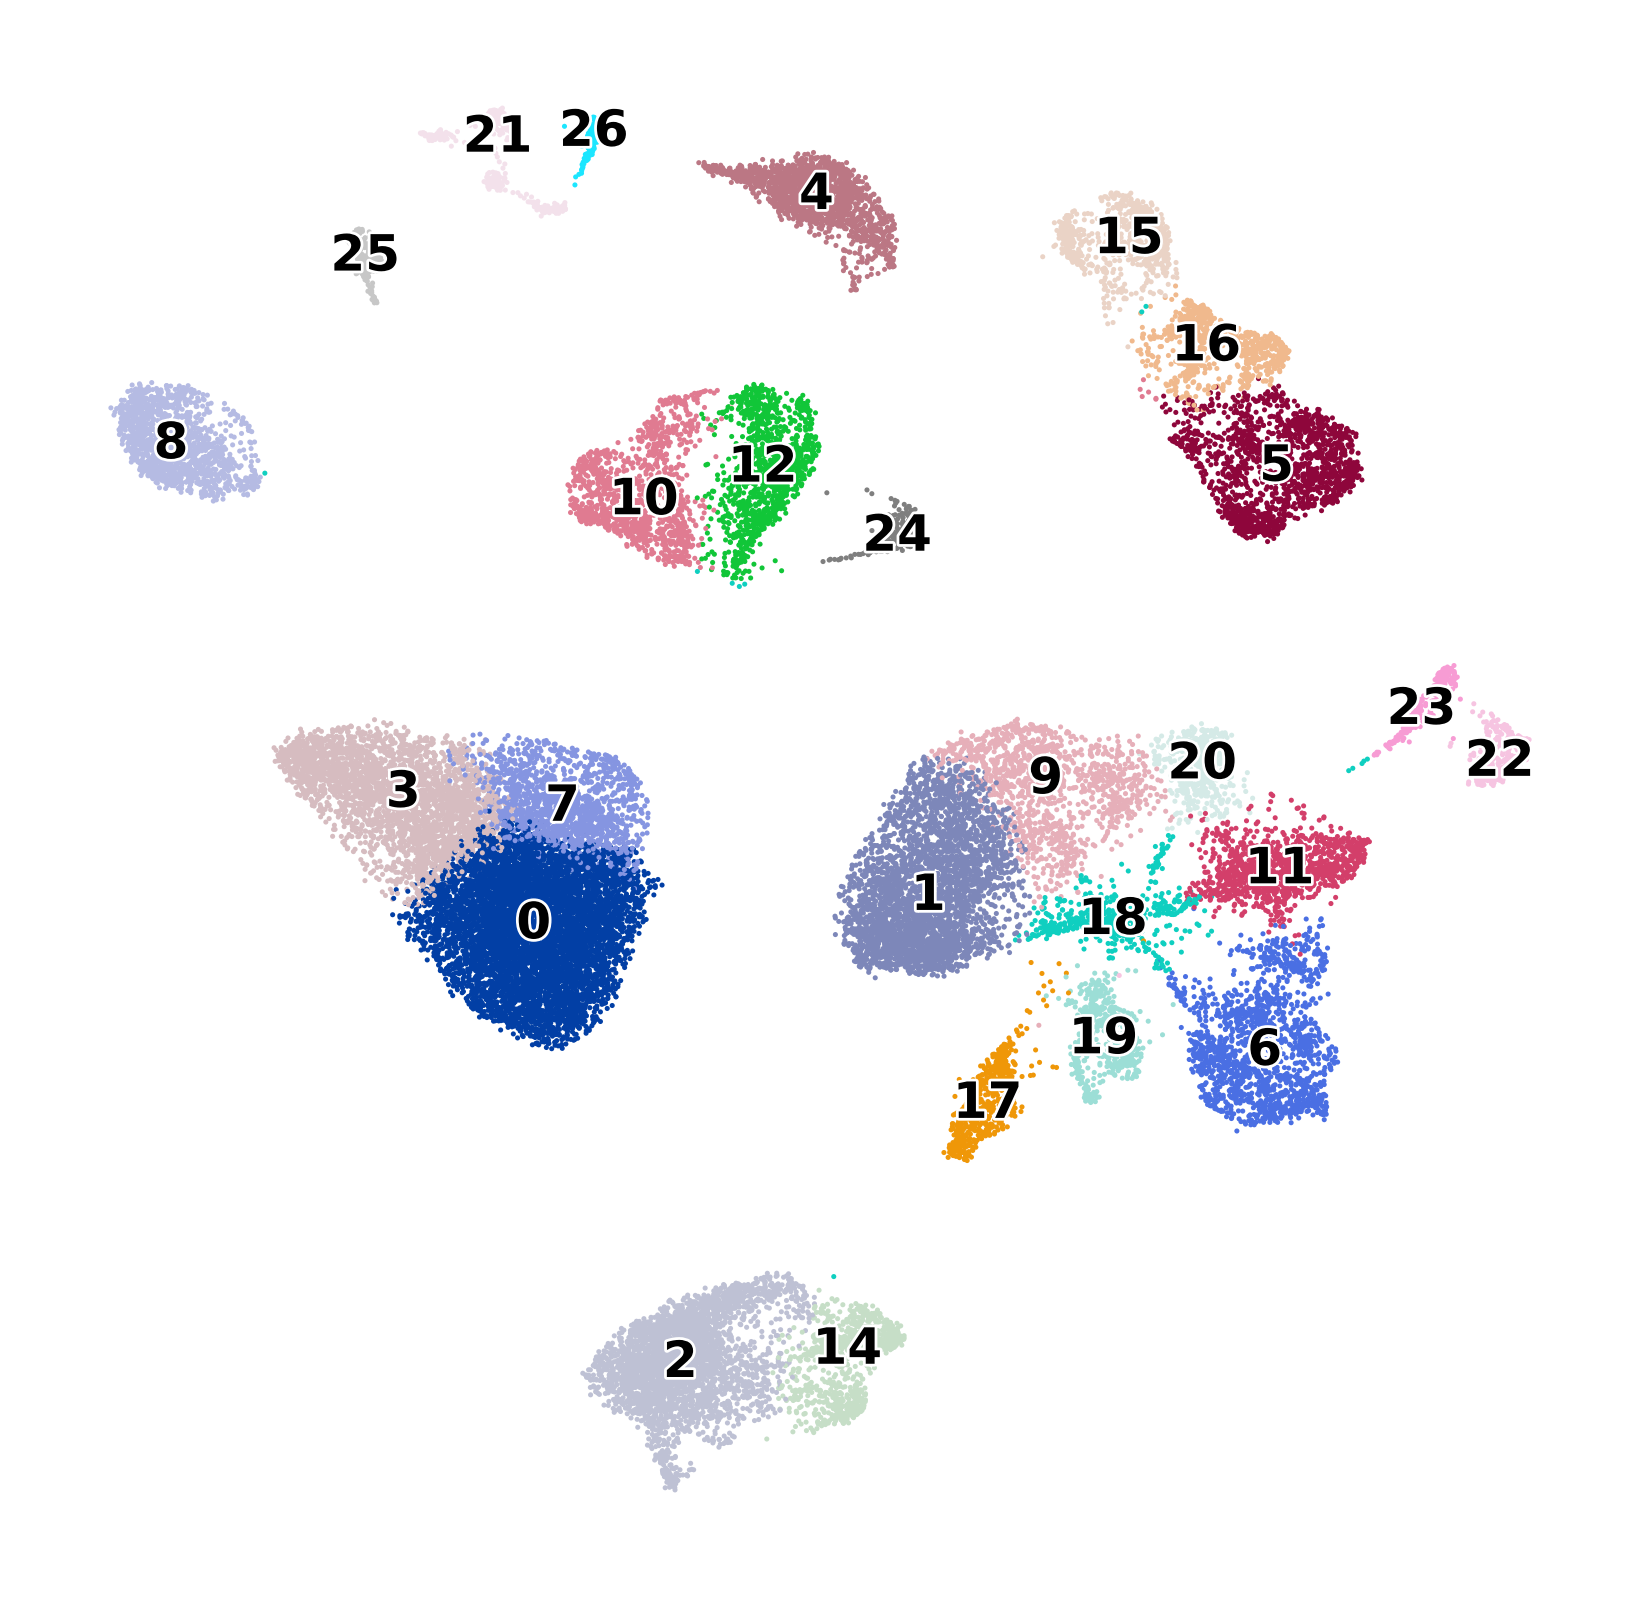

In [35]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000, figsize=(5,5), facecolor='white')
sc.pl.umap(
    adata, 
    color=['leiden'],
    frameon=False, 
    legend_loc='on data', 
    legend_fontoutline=1, 
    legend_fontsize=9, 
    title='',
    save='_leiden_paga.pdf'
)


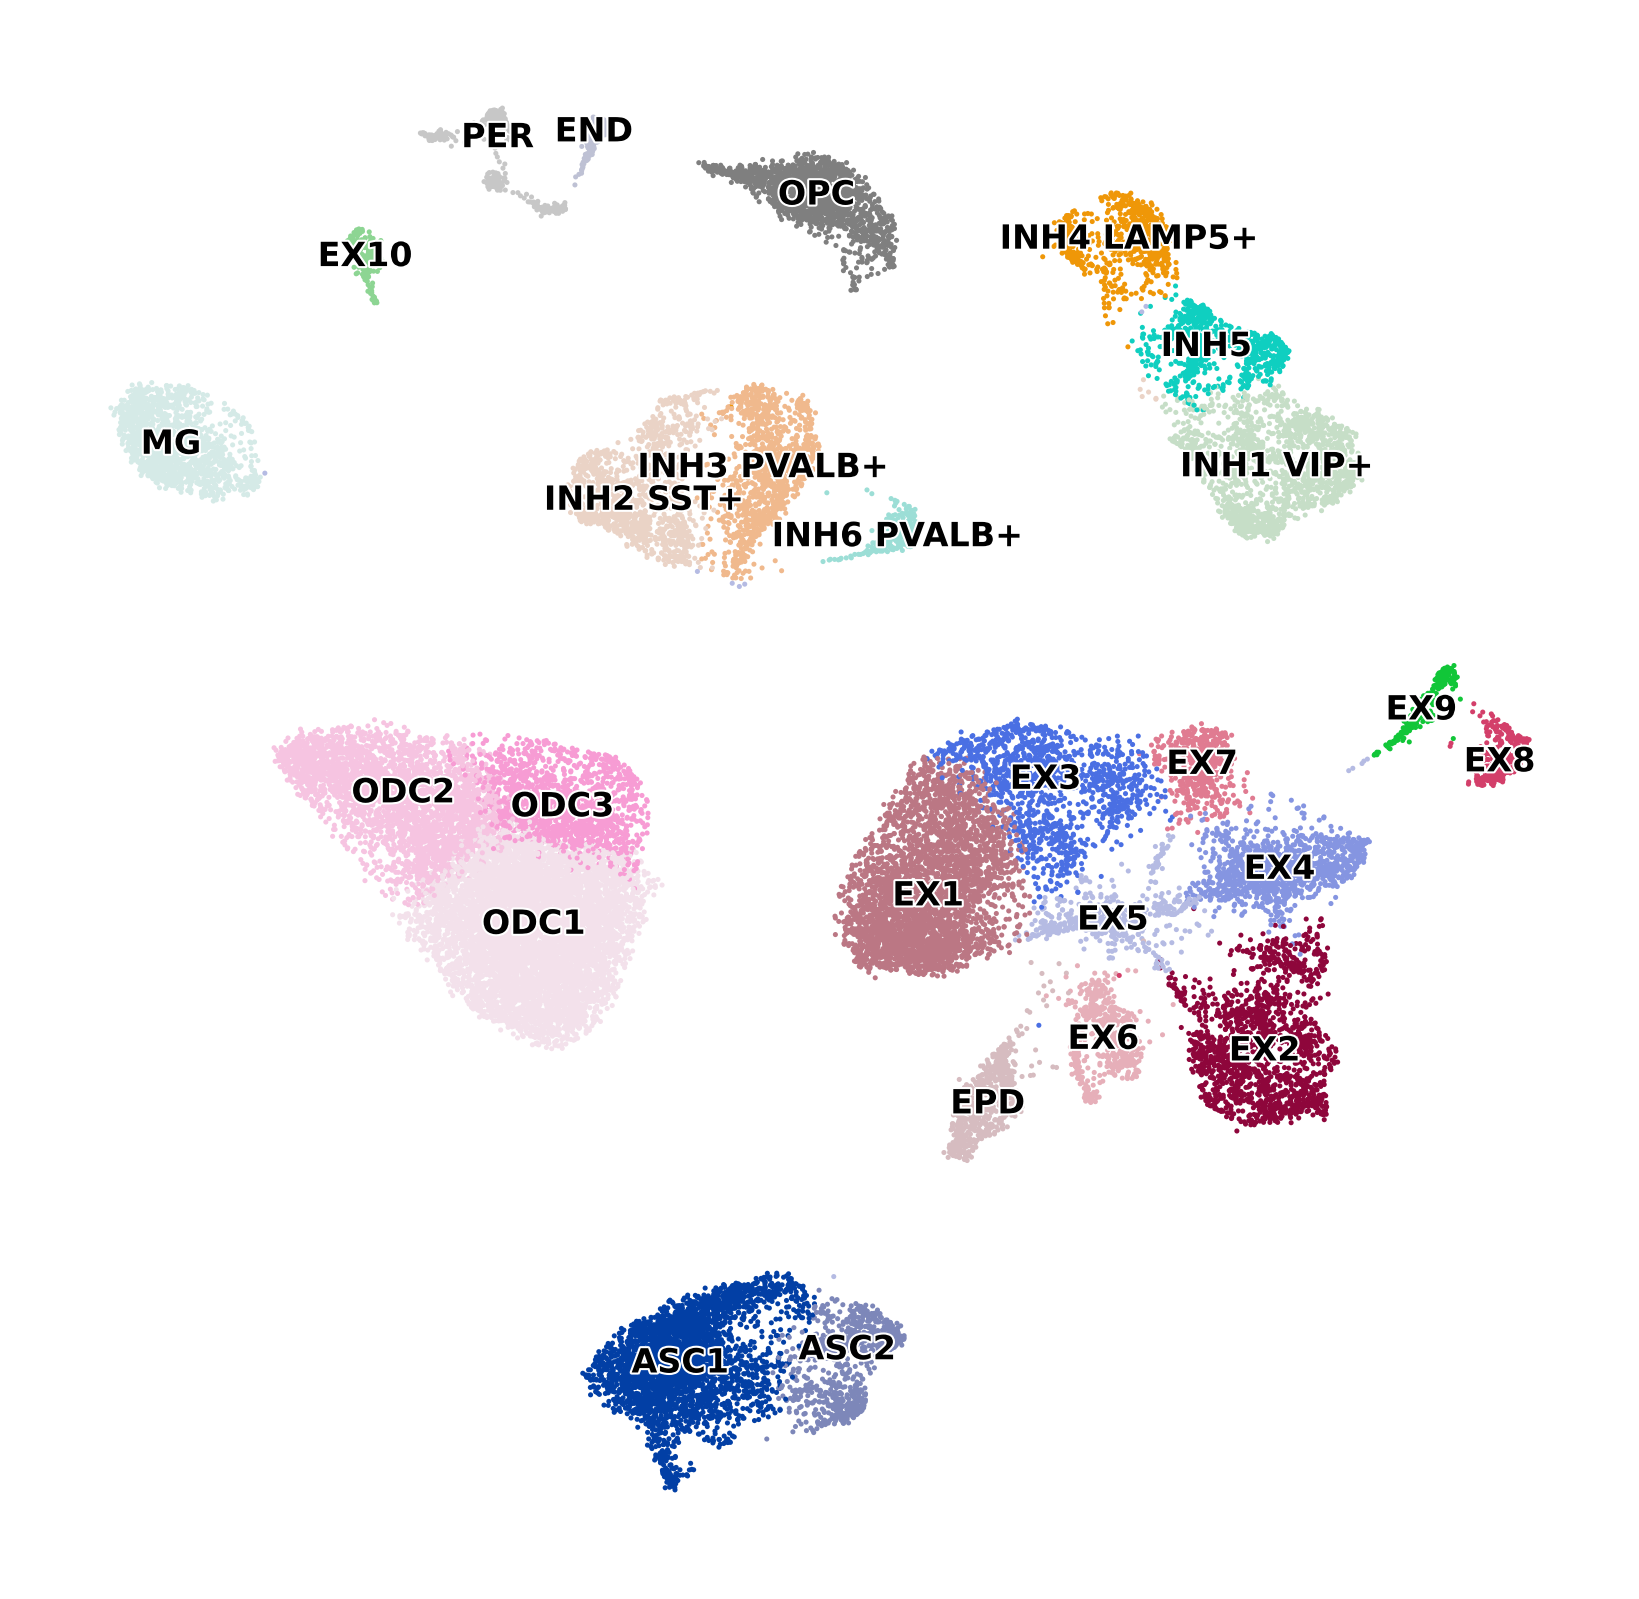

In [36]:
sc.settings.set_figure_params(dpi=200, dpi_save=1000, figsize=(5,5), facecolor='white')
sc.pl.umap(
    adata, 
    color=['annotation'],
    frameon=False, 
    legend_loc='on data', 
    legend_fontoutline=.75, 
    legend_fontsize=6, 
    title='',
    save='_annotation.pdf'
)


## Save processed dataset:

In [37]:
# write anndata:
adata.write_h5ad('{}/Morabito_2020_processed.h5ad'.format(data_dir))

In [38]:
# write obs table 
adata.obs['UMAP_1'] = adata.obsm['X_umap'][:,0]
adata.obs['UMAP_2'] = adata.obsm['X_umap'][:,1]
adata.obs.to_csv('{}/Morabito_2020_processed_obs.csv'.format(data_dir))

# write var table:
adata.var.to_csv('{}/Morabito_2020_processed_var.csv'.format(data_dir))

In [39]:
# save the sparse matrix for Seurat:
X = adata.layers['counts']
X = scipy.sparse.csr_matrix.transpose(X)
io.mmwrite('{}Morabito_2020_counts.mtx'.format(data_dir), X)

In [40]:
# save the Harmony Matrix for Seurat:
pd.DataFrame(adata.obsm['X_pca_harmony']).to_csv('{}/Morabito_2020_processed_harmony.csv'.format(data_dir))
